In [361]:
#Importing needed modules .
from pandas import read_csv , concat ,DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Instancing from 'LabelEncoder' and 'Tokenizer' objects .
encoder = LabelEncoder()
tokenizer = Tokenizer(oov_token='<00U00>')

In [362]:
#Reading files .
file_click = read_csv("D:\\datasets\\clickbait\\clickbait.csv")
file_not_click = read_csv("D:\\datasets\\clickbait\\notClickbait.csv")
click = file_click.copy()
notclick = file_not_click.copy()

In [363]:
#Extracting labels .
label = ['click' for i in range(len(click))]
label_not_click = ['not_click' for i in range(len(notclick))]
label.extend(label_not_click)

In [364]:
#Unioning both files  both files .
df = concat([click,notclick],ignore_index= True,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           201 non-null    object 
 1   Video Title  201 non-null    object 
 2   Views        201 non-null    int64  
 3   Likes        201 non-null    int64  
 4   Dislikes     201 non-null    int64  
 5   Favorites    200 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [365]:
#Encoding labels to 0 and 1 .
enoded_lbl = DataFrame(encoder.fit_transform(label),columns=['class'])
enoded_lbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   201 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [366]:
#Creating finall data frame .
df = concat([df,enoded_lbl],axis=1)

In [367]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [368]:
#Seperating features and classes . 
features = [Filter(text) for text in df['Video Title']]
lbl = df['class'].to_numpy().reshape(-1,1)
#Tokinzing features and make a matrix from them .
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=3)

In [369]:
#Making train and test sets .
xtr , xts , ytr , yts = train_test_split(matrix,lbl,test_size=0.03,random_state=0)

In [370]:
print(f'There are {len(xtr)} samples for  training and {len(xts)} for testing .')

There are 194 samples for  training and 7 for testing .


In [371]:
yts

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [372]:
#Building a model and compile it .
model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,2,input_length=3),
                          layers.GlobalAveragePooling1D(),
                           layers.Dense(24,activation='relu'),
                          layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [373]:
#Data train .
history = model.fit(xtr,ytr,epochs=50,validation_data=(xts,yts))

Epoch 1/50
7/7 [==============================] - 1s 22ms/step - loss: 0.6930 - accuracy: 0.5412 - val_loss: 0.6939 - val_accuracy: 0.5714
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.6340 - val_loss: 0.6932 - val_accuracy: 0.4286
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.7010 - val_loss: 0.6911 - val_accuracy: 0.4286
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.7371 - val_loss: 0.6893 - val_accuracy: 0.5714
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.7887 - val_loss: 0.6877 - val_accuracy: 0.7143
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.8454 - val_loss: 0.6856 - val_accuracy: 0.8571
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.8763 - val_loss: 0.6837 - val_accuracy: 0.8571
Epoch 8/50
7/7 [=================

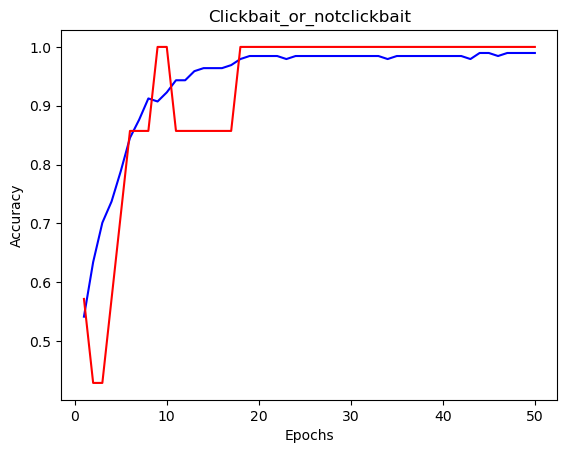

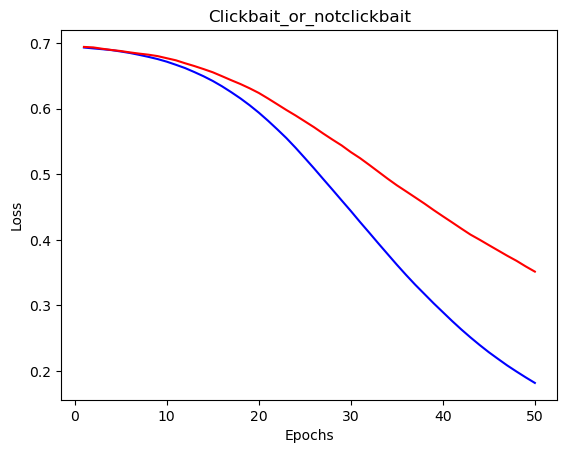

In [374]:
#Visualize models performance
epoch = range(1,51)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Clickbait_or_notclickbait')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Clickbait_or_notclickbait')
plt.show()